In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
xCount = 7
crc = QuantumCircuit(xCount, xCount-1)

#random modifiers of the input
import numpy as np
half = int(xCount / 2)
ones = [np.random.randint(half), np.random.randint(half) + half]
for i in ones:
    crc.x(i)
crc.barrier()
###    

for i in range(xCount-1):
    crc.h(i)
    
crc.x(xCount-1)
crc.h(xCount-1)
crc.barrier()
crc.draw()

░ ┌───┐      ░ 
q_0: ──────░─┤ H ├──────░─
     ┌───┐ ░ ├───┤      ░ 
q_1: ┤ X ├─░─┤ H ├──────░─
     └───┘ ░ ├───┤      ░ 
q_2: ──────░─┤ H ├──────░─
           ░ ├───┤      ░ 
q_3: ──────░─┤ H ├──────░─
     ┌───┐ ░ ├───┤      ░ 
q_4: ┤ X ├─░─┤ H ├──────░─
     └───┘ ░ ├───┤      ░ 
q_5: ──────░─┤ H ├──────░─
           ░ ├───┤┌───┐ ░ 
q_6: ──────░─┤ X ├┤ H ├─░─
           ░ └───┘└───┘ ░ 
c: 6/═════════════════════

In [3]:
#some balanced function construct with cnots
for i in range(xCount-1):
    crc.cx(i, xCount-1)
    # crc.i(i) #or a constant function to have 0s at the measurement
crc.barrier()    
###########
crc.draw()

░ ┌───┐      ░                                ░ 
q_0: ──────░─┤ H ├──────░───■────────────────────────────░─
     ┌───┐ ░ ├───┤      ░   │                            ░ 
q_1: ┤ X ├─░─┤ H ├──────░───┼────■───────────────────────░─
     └───┘ ░ ├───┤      ░   │    │                       ░ 
q_2: ──────░─┤ H ├──────░───┼────┼────■──────────────────░─
           ░ ├───┤      ░   │    │    │                  ░ 
q_3: ──────░─┤ H ├──────░───┼────┼────┼────■─────────────░─
     ┌───┐ ░ ├───┤      ░   │    │    │    │             ░ 
q_4: ┤ X ├─░─┤ H ├──────░───┼────┼────┼────┼────■────────░─
     └───┘ ░ ├───┤      ░   │    │    │    │    │        ░ 
q_5: ──────░─┤ H ├──────░───┼────┼────┼────┼────┼────■───░─
           ░ ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_6: ──────░─┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘ ░ 
c: 6/══════════════════════════════════════════════════════

In [4]:
for i in range(xCount-1):
    crc.h(i)
crc.barrier()

for i in ones:
    crc.x(i)
crc.barrier()
crc.draw()

░ ┌───┐      ░                                ░ ┌───┐ ░       ░ 
q_0: ──────░─┤ H ├──────░───■────────────────────────────░─┤ H ├─░───────░─
     ┌───┐ ░ ├───┤      ░   │                            ░ ├───┤ ░ ┌───┐ ░ 
q_1: ┤ X ├─░─┤ H ├──────░───┼────■───────────────────────░─┤ H ├─░─┤ X ├─░─
     └───┘ ░ ├───┤      ░   │    │                       ░ ├───┤ ░ └───┘ ░ 
q_2: ──────░─┤ H ├──────░───┼────┼────■──────────────────░─┤ H ├─░───────░─
           ░ ├───┤      ░   │    │    │                  ░ ├───┤ ░       ░ 
q_3: ──────░─┤ H ├──────░───┼────┼────┼────■─────────────░─┤ H ├─░───────░─
     ┌───┐ ░ ├───┤      ░   │    │    │    │             ░ ├───┤ ░ ┌───┐ ░ 
q_4: ┤ X ├─░─┤ H ├──────░───┼────┼────┼────┼────■────────░─┤ H ├─░─┤ X ├─░─
     └───┘ ░ ├───┤      ░   │    │    │    │    │        ░ ├───┤ ░ └───┘ ░ 
q_5: ──────░─┤ H ├──────░───┼────┼────┼────┼────┼────■───░─┤ H ├─░───────░─
           ░ ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░       ░ 
q_6: ──────░─┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─░───────░───────░─
           ░ └───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘ ░       ░       ░ 
c: 6/══════════════════════════════════════════════════════════════════════

In [5]:
crc.measure([i for i in range(xCount-1)], [i for i in range(xCount-1)])
crc.draw()

░ ┌───┐      ░                                ░ ┌───┐ ░       ░ ┌─┐»
q_0: ──────░─┤ H ├──────░───■────────────────────────────░─┤ H ├─░───────░─┤M├»
     ┌───┐ ░ ├───┤      ░   │                            ░ ├───┤ ░ ┌───┐ ░ └╥┘»
q_1: ┤ X ├─░─┤ H ├──────░───┼────■───────────────────────░─┤ H ├─░─┤ X ├─░──╫─»
     └───┘ ░ ├───┤      ░   │    │                       ░ ├───┤ ░ └───┘ ░  ║ »
q_2: ──────░─┤ H ├──────░───┼────┼────■──────────────────░─┤ H ├─░───────░──╫─»
           ░ ├───┤      ░   │    │    │                  ░ ├───┤ ░       ░  ║ »
q_3: ──────░─┤ H ├──────░───┼────┼────┼────■─────────────░─┤ H ├─░───────░──╫─»
     ┌───┐ ░ ├───┤      ░   │    │    │    │             ░ ├───┤ ░ ┌───┐ ░  ║ »
q_4: ┤ X ├─░─┤ H ├──────░───┼────┼────┼────┼────■────────░─┤ H ├─░─┤ X ├─░──╫─»
     └───┘ ░ ├───┤      ░   │    │    │    │    │        ░ ├───┤ ░ └───┘ ░  ║ »
q_5: ──────░─┤ H ├──────░───┼────┼────┼────┼────┼────■───░─┤ H ├─░───────░──╫─»
           ░ ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░       ░  ║ »
q_6: ──────░─┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─░───────░───────░──╫─»
           ░ └───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘ ░       ░       ░  ║ »
c: 6/═══════════════════════════════════════════════════════════════════════╩═»
                                                                            0 »
«                    
«q_0: ───────────────
«     ┌─┐            
«q_1: ┤M├────────────
«     └╥┘┌─┐         
«q_2: ─╫─┤M├─────────
«      ║ └╥┘┌─┐      
«q_3: ─╫──╫─┤M├──────
«      ║  ║ └╥┘┌─┐   
«q_4: ─╫──╫──╫─┤M├───
«      ║  ║  ║ └╥┘┌─┐
«q_5: ─╫──╫──╫──╫─┤M├
«      ║  ║  ║  ║ └╥┘
«q_6: ─╫──╫──╫──╫──╫─
«      ║  ║  ║  ║  ║ 
«c: 6/═╩══╩══╩══╩══╩═
«      1  2  3  4  5

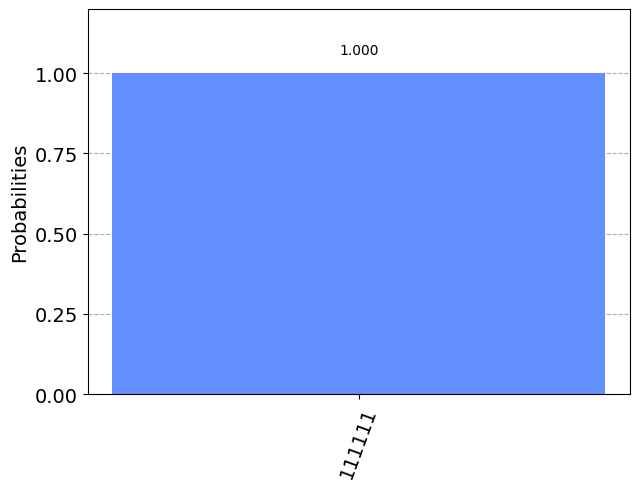

In [6]:
backend = Aer.get_backend("qasm_simulator")
result = execute(crc, backend=backend, shots=1024).result()
counts = result.get_counts(crc)
plot_histogram([counts])

In [7]:
# IBMQ.load_account()
# Aer.backends()
# provider = IBMQ.get_provider("ibm-q")
# provider.backends()
# for backend in provider.backends():
#     try:
#         qubitCount = len(backend.properties().qubits)
#     except:
#         qubitCount = "simulated"
#     print(f"{backend.name()}: {backend.status().pending_jobs} jobs, {qubitCount} qubits")

In [8]:
# provider = IBMQ.get_provider("ibm-q")
# quantumComputer = provider.get_backend("simulator_statevector")
# job = execute(crc, backend=quantumComputer, shots=1024)
# from qiskit.tools.monitor import job_monitor
# job_monitor(job)
# quantumResult = job.result()
# plot_histogram([quantumResult.get_counts(crc)])